#### <b>Create Color Palette</b>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys

HUE: H - Hue, the angle around the wheel; S - Saturation, the distance from the center; V - Value, the brightness of the color

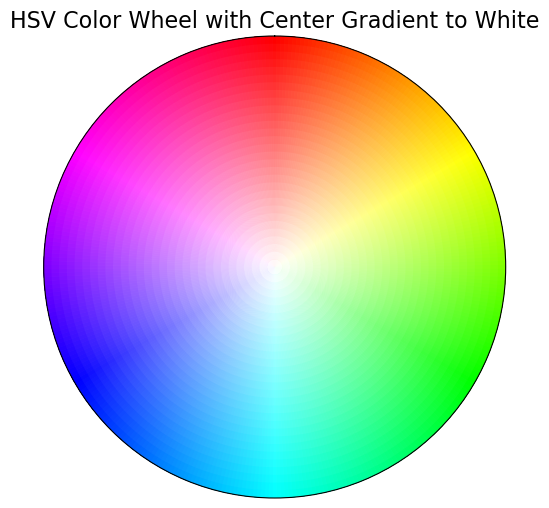

In [17]:
NUM_COLORS = 360     # Number of distinct hues in the outer ring
NUM_RINGS = 30       # Number of concentric rings for the gradient
OUTER_RADIUS = 1.0   # Max radius of the wheel

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# 2. Iterate to draw concentric rings
for r_idx in range(NUM_RINGS):
    # Calculate the radius for this ring (from inner to outer)
    # The innermost ring will have a small radius, gradually increasing
    current_outer_r = OUTER_RADIUS * (r_idx + 1) / NUM_RINGS
    current_inner_r = OUTER_RADIUS * r_idx / NUM_RINGS

    # Calculate Saturation and Value (Brightness) for this ring
    # As r_idx increases (outward), Saturation increases to 1.0, Value decreases towards 1.0
    # As r_idx decreases (inward), Saturation decreases to 0.0, Value increases towards 1.0 (white)
    
    # Saturation will go from ~0 (center) to 1.0 (outer edge)
    current_saturation = (r_idx + 1) / NUM_RINGS
    # Value will go from ~1.0 (center - white) to 1.0 (outer edge - pure hue)
    # We keep Value high as we want white in the center, not black
    current_value = 1.0 
    
    # Generate colors for this ring
    colors = []
    for i in range(NUM_COLORS):
        hue = i / NUM_COLORS
        rgb = colorsys.hsv_to_rgb(hue, current_saturation, current_value)
        colors.append(rgb)

    # Plot the ring using ax.bar
    theta = np.linspace(0, 2 * np.pi, NUM_COLORS, endpoint=False)
    width = 2 * np.pi / NUM_COLORS

    ax.bar(theta, current_outer_r, # Bars extend to current_outer_r
           width=width, 
           color=colors, 
           bottom=current_inner_r, # Bars start from current_inner_r
           linewidth=0) # No lines between segments for a smooth appearance


# 3. Customize the Plot Appearance
ax.set_theta_zero_location('N') # Start 'Red' (hue 0) at the top (North)
ax.set_theta_direction(-1)     # Go clockwise (standard for color wheels)

ax.set_rticks([]) # Hide radial ticks
ax.set_xticks([])  # Hide angular ticks/labels

# Set the radial limits to ensure the entire wheel fits
ax.set_rlim(0, OUTER_RADIUS)

ax.set_title('HSV Color Wheel with Center Gradient to White', fontsize=16)

plt.show()

In [9]:
# --- Define the desired point on the wheel ---
ANGLE_DEGREES = 270  # Example: 270 degrees (approximately Magenta)
RADIUS_RATIO = 0.8   # Example: 80% of the distance from the center (slightly desaturated)

# 1. Calculate Hue (H)
# Normalize the angle from 0-360 degrees to 0.0-1.0
HUE = ANGLE_DEGREES / 360.0

# 2. Calculate Saturation (S)
# The radius corresponds directly to the saturation
SATURATION = RADIUS_RATIO

# 3. Define Value (V)
# Value (Brightness) was set to 1.0 for the entire wheel in the previous code
VALUE = 1.0

# 4. Convert HSV back to RGB
# The output is a tuple of (R, G, B) normalized from 0.0 to 1.0
r_norm, g_norm, b_norm = colorsys.hsv_to_rgb(HUE, SATURATION, VALUE)

# --- Output the result ---
print(f"Polar Coordinates: Angle={ANGLE_DEGREES}°, Radius={RADIUS_RATIO:.1f}")
print("-" * 30)
print(f"Resulting Normalized RGB: ({r_norm:.4f}, {g_norm:.4f}, {b_norm:.4f})")

# Convert to a standard 0-255 RGB integer tuple for practical use
r_int = int(r_norm * 255)
g_int = int(g_norm * 255)
b_int = int(b_norm * 255)

print(f"Resulting RGB (0-255): ({r_int}, {g_int}, {b_int})")

Polar Coordinates: Angle=270°, Radius=0.8
------------------------------
Resulting Normalized RGB: (0.6000, 0.2000, 1.0000)
Resulting RGB (0-255): (153, 50, 255)


To use 4x4 color spectrum:

https://expressingyourtruth.blogspot.com/2013/02/the-4x4-color-wheel-16-seasons.html

In [ ]:
# Calculate the angle and saturation by doing vector summation
a = np.array([1.0, 0])
b = np.array([0., 0.5])
c = np.array([-.23, 0])
d = np.array([0., -0.7])

R = a + b + c + d
print("Cartesian point: ", R)
# convert to theta
theta_radians = np.atan2(R[1], R[0])
theta_degrees = np.rad2deg(theta_radians)
if theta_degrees < 0:
    theta_degrees += 360.0
r = np.sqrt(R[0]**2 + R[1]**2)
print("Polar coordinates: ", theta_degrees, "˚ ", r)

Cartesian point:  [ 0.77 -0.2 ]
Polar coordinates:  345.43972438064316 ˚  0.7955501241279521
